In [2]:
# DataQuest - Build Your First Machine Learning Project
# Using Linear Regression

### Step 1 - Form a Hypothesis 
### Step 2 - Find The Data
### Step 3 - Reshape The Data
### Step 4 - Clean The Data
### Step 5 - Error Metric
### Step 6 - Split The Data
### Step 7 - Train a Model

In [1]:
# You train the data on the training data and check its accuarcy on the test data

In [38]:
import pandas as pd

In [52]:
teams = pd.read_csv(r'Teams.csv')
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [70]:
# Take out extra columns

teams = teams[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]
teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


In [71]:
#checking correaltion between the medals column and other columns
teams.corr()['medals']

C:\Users\S00742997\AppData\Local\Temp\ipykernel_5420\4176926776.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()['medals']


year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [72]:
# this shows a strong correlation between previous medals and atheletes, indicating that we can do linear regression

In [73]:
import seaborn as sns

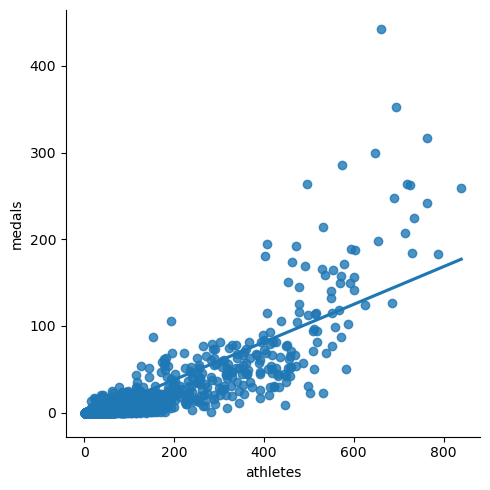

In [74]:
sns.lmplot(x = 'athletes', y ='medals', data=teams, fit_reg= True, ci = None)
#shows a relation ship that the more atheltes we have, the more medals well win. We can see a linear relationship

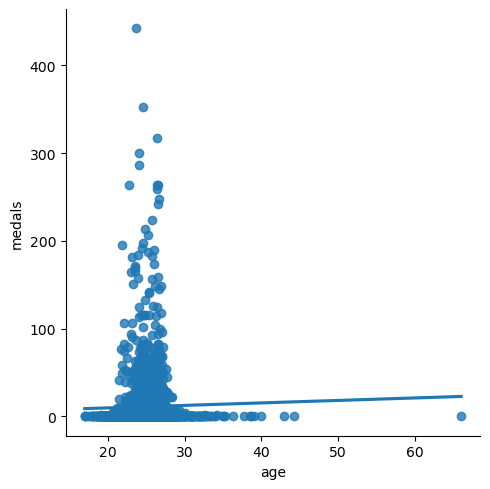

In [75]:
# relationship between medals and age ( correaltion showed very poor relation, so we wont use it as a driving force)
sns.lmplot(x = 'age', y = 'medals', data = teams, fit_reg = True, ci = None)

<Axes: ylabel='Frequency'>

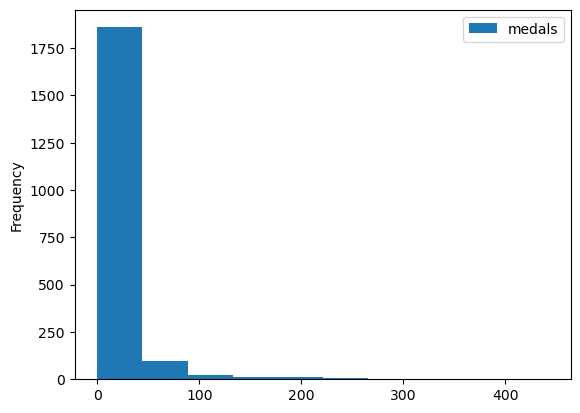

In [76]:
teams.plot.hist(y ='medals')

### Data Cleaning

In [77]:
# Find rows that have missing values

In [78]:
teams[teams.isnull().any(axis=1)]
# Based off table below, Albania is NaN in the previous medals column because they did not participate in the olympics prior.
# We dont have medals for the year of 1988

,team,country,year,athletes,age,prev_medals,medals


In [79]:
teams = teams.dropna()

In [80]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [81]:
# Splitting the Data

In [82]:
# The data is time series, some rows should show up before some other rows, so we must split it in a way where we can 
# train with the past, and test with the future values. 
# Well train with data from before 2012, and test it with 2012 data and 2016 data

In [83]:
train = teams[teams['year'] < 2012].copy()
test = teams[teams['year'] >= 2012].copy()

In [84]:
train.shape

(1609, 7)

In [85]:
test.shape

(405, 7)

#### Training Our Model

In [86]:
from sklearn.linear_model import LinearRegression # this helps us train and make predicitions with a linear model

In [91]:
reg = LinearRegression()

# we are gonna train our linear model to train the model
# this will predict the target column
predictors = ['athletes', 'prev_medals']
target = 'medals'

In [93]:
reg.fit(train[predictors], train[target])

LinearRegression()

In [94]:
predictions = reg.predict(test[predictors])

In [96]:
predictions
#want to prevent negative numbers and have whole numbers

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [97]:
test['predictions'] = predictions

In [98]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [104]:
test.loc[test['predictions']<0, 'predictions'] = 0

# index our test data frame, and find any rows where the pred columns is less than 0 and will replace it with 0. 
# so negatives are now 0
test.drop('predicitions', axis=1, inplace=True)
test['predictions'] = test['predictions'].round()
test


,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [105]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test['medals'], test['predictions'])

In [106]:
error #this means that we were on average 3.3 medals away from the actual number of winners. Now time to investagite if that is good

3.2987654320987656

In [107]:
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [110]:
# Compare Team by Team
test[test['team'] == 'USA']

# So we predicited 285 for 2012 and the actual was 248

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [117]:
test[test['team'] == 'IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [133]:
errors = (test['medals']-test['predictions']).abs()
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [137]:
error_by_team = errors.groupby(test['team']).mean()
error_by_team

# this shows the error in difference 

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [138]:
medals = test['medals'].groupby(test['team']).mean()

In [142]:
error_ratio = error_by_team / medals_by_team # ratio between the error

In [146]:
error_ratio

# NAN is because we are dividng by zero (they have 0 medals)

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [153]:
error_ratio[~pd.isnull(error_ratio)]


team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [155]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [156]:
error_ratio.dropna().sort_values()
# countries that send more athletes have a greater predicition, with lower preidction

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

In [163]:
test[test['team'] == 'AUT']

,team,country,year,athletes,age,prev_medals,medals,predictions
129,AUT,Austria,2012,90,28.2,3.0,0,7.0
130,AUT,Austria,2016,85,27.4,0.0,2,4.0


In [164]:
# To improve 

# add in more predictors
# try different models